# GS Scholar Analysis

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab1/ai_scholar/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

Mounted at /content/drive


In [2]:
import csv
import numpy as np
import sys
from pathlib import Path
import pickle

In [17]:
scholar_all = np.load(GOOGLE_DRIVE_PATH+'general/gs_scholars_all_upd.npy', allow_pickle=True)

In [ ]:
del scholar_all

In [ ]:
scholar_all[0]

{'academic': False,
 'academic_age': 31,
 'academic_lifespan': 28,
 'cit_sum_before_year': {'1994': 39,
  '1995': 86,
  '1996': 187,
  '1997': 287,
  '1998': 383,
  '1999': 500,
  '2000': 615,
  '2001': 727,
  '2002': 833,
  '2003': 951,
  '2004': 1070,
  '2005': 1203,
  '2006': 1357,
  '2007': 1543,
  '2008': 1719,
  '2009': 1866,
  '2010': 2005,
  '2011': 2129,
  '2012': 2323,
  '2013': 2487,
  '2014': 2615,
  '2015': 2758,
  '2016': 2935,
  '2017': 3051,
  '2018': 3167,
  '2019': 3261,
  '2020': 3335,
  '2021': 3411},
 'citation_table': ['3539', '27'],
 'cites': {'cites': ['39',
   '47',
   '101',
   '100',
   '96',
   '117',
   '115',
   '112',
   '106',
   '118',
   '119',
   '133',
   '154',
   '186',
   '176',
   '147',
   '139',
   '124',
   '194',
   '164',
   '128',
   '143',
   '177',
   '116',
   '116',
   '94',
   '74',
   '76',
   '24'],
  'years': ['1994',
   '1995',
   '1996',
   '1997',
   '1998',
   '1999',
   '2000',
   '2001',
   '2002',
   '2003',
   '2004',
   '20

## academic age & lifespan analysis

In [ ]:
total_url_dict, female_url_dict = {}, {}
bug_check = []
bug_paper_check = []
for scholar in scholar_all:
  papers = scholar['papers']
  gender = df.loc[df['url'] == scholar['url'], 'gender'].item()
  year_set = set()
  for paper in papers:
    if paper[5] == '':
      continue
    if int(paper[5]) <= 1950:
      bug_paper_check.append((scholar['url'], int(paper[5])))
      continue
    if int(paper[5]) > 2022:
      continue
    year_set.add(int(paper[5]))
  if len(year_set) == 0:
    continue
    # year_first, year_last = 2023, 2022
    # bug_check.append(scholar['url'])
  year_first, year_last = min(year_set), max(year_set)

  total_url_dict[scholar['url']] = (year_first, year_last)
  if gender == 'F':
    female_url_dict[scholar['url']] = (year_first, year_last)

In [ ]:
bug_check

[]

In [ ]:
bug_paper_check

In [ ]:
total_aca_age = pd.Series([2022-year[0]+1 for year in total_url_dict.values()])
total_aca_span = pd.Series([year[1] - year[0]+1 for year in total_url_dict.values()])
female_aca_age = pd.Series([2022-year[0]+1 for year in female_url_dict.values()])
female_aca_span = pd.Series([year[1] - year[0]+1 for year in female_url_dict.values()])

In [ ]:
total_aca_age.describe()

count    78065.000000
mean        16.871069
std         10.624083
min          2.000000
25%         10.000000
50%         14.000000
75%         20.000000
max         72.000000
dtype: float64

In [ ]:
female_aca_age.describe()

count    8423.000000
mean       16.364003
std         9.868633
min         2.000000
25%        10.000000
50%        14.000000
75%        20.000000
max        72.000000
dtype: float64

In [ ]:
female_aca_span.describe()

count    8423.000000
mean       14.944319
std         9.991298
min         1.000000
25%         8.000000
50%        12.000000
75%        19.000000
max        72.000000
dtype: float64

In [ ]:
total_aca_span.describe()

count    78065.000000
mean        15.451841
std         10.719664
min          1.000000
25%          8.000000
50%         13.000000
75%         19.000000
max         72.000000
dtype: float64

## top coauthors analysis

In [ ]:
!pip install efficiency

In [ ]:
class Name2Gender:
    def __init__(self):
        self.full_name2gender = self._load_full_name_gender()
        self.first_name2gender = self._load_first_name_gender()

    def _load_first_name_gender(self):
        # 100711 lines
        from collections import defaultdict
        df = pd.read_csv(GOOGLE_DRIVE_PATH+"data/gender_preprocess/firstname_gender.csv")
        first_name_n_gender = df.to_dict(orient='records')
        first_name2gender = {dic['name']: dic['gender'] for dic in first_name_n_gender}
        return first_name2gender

    def _load_full_name_gender(self):
        def _file2full_name(file):
            from efficiency.log import fread
            full_names = fread(GOOGLE_DRIVE_PATH+'data/gender_preprocess/'+file, delete_empty=True, if_strip=True)
            # full_names = U.read_file(file)
            full_names = [' '.join(i.split(', ', 1)[::-1]).lower() for i in full_names]
            return full_names

        gender2file = {'M': 'acl-male.txt',
                       'F': 'acl-female.txt',
                       }
        full_name2gender = {}
        for gender, file in gender2file.items():
            full_names = _file2full_name(file)
            full_name2gender.update({i: gender for i in full_names})
        return full_name2gender

    def lookup_gender(self, full_name):
        gender = self.full_name2gender.get(full_name.lower(), '-')
        if gender == '-':
            first_name = full_name.rsplit(' ', 1)[0].lower()
            gender = self.first_name2gender.get(first_name, '-')
        return gender

In [ ]:
name2gender = Name2Gender()

In [ ]:
name2gender.lookup_gender('Christian A. Lang')

'-'

In [ ]:
print(scholar_all[1]['co_authors'])

In [ ]:
percent_list = []
for scholar in scholar_all: # scholar_all is np.load() from 78k_scholar_new
  if name2gender.lookup_gender(scholar['name']) == 'F':
      co_authors = scholar['co_authors']
      if co_authors:
          male_count, female_count = 0, 0
          for each in co_authors:
              # coauthor_names.append(each[1])
              if name2gender.lookup_gender(each[1]) == 'M':
                  male_count += 1
              elif name2gender.lookup_gender(each[1]) == 'F':
                  female_count += 1         
          if male_count + female_count != 0:
              female_percentage = female_count / (male_count + female_count)
          elif male_count == 0 and female_count != 0:
              female_percentage = 1
          elif female_count == 0 and male_count != 0:
              female_percentage = 0
          else:
              continue
          percent_list.append(female_percentage)
percent_series = pd.Series(percent_list)
percent_series.describe()

count    4203.000000
mean        0.234781
std         0.244564
min         0.000000
25%         0.000000
50%         0.200000
75%         0.333333
max         1.000000
dtype: float64

# scholar_centric analysis

In [ ]:
# %%capture
import pandas as pd
df = pd.DataFrame.from_records(scholar_all)
df.head(1)

In [ ]:
df.head(5)

In [ ]:
# For each of the 78K scholars, “#co-authors/scholar_profile” report “avg+/- std”
for idx, row in df.iterrows():
  co_authors = row['co_authors']
  if co_authors is not None:
    df.at[idx, 'num_coauthors'] = len(co_authors)
  else:
    df.at[idx, 'num_coauthors'] = None

In [ ]:
df['num_coauthors']

0         NaN
1        20.0
2         NaN
3         2.0
4        20.0
         ... 
78061     8.0
78062     NaN
78063     NaN
78064    18.0
78065    18.0
Name: num_coauthors, Length: 78066, dtype: float64

In [ ]:
df['num_coauthors'].describe()

count    53729.000000
mean        11.021739
std          6.592891
min          1.000000
25%          5.000000
50%         10.000000
75%         19.000000
max         20.000000
Name: num_coauthors, dtype: float64

In [ ]:
df['num_coauthors'].isna().sum()

24337

In [ ]:
# On average, report %co-authors can be found in gs_scholars.jsonl (⅕ or 1/10 missing)
print(df['num_coauthors'].isna().sum() / len(df['num_coauthors']))

0.31174903286962313


In [ ]:
# Make sure that #co-authors do not differ #topics, otherwise we can normalized_topic_diversity = num_topics_among_all_coauthors/num_coauthors
for idx, row in df.iterrows():
  co_domain = row['domain_labels']
  if co_domain is not None:
    df.at[idx, 'num_domain'] = len(co_domain)
  else:
    df.at[idx, 'num_domain'] = None

In [ ]:
df['num_domain'].describe()

count    78066.000000
mean         3.616017
std          1.197896
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: num_domain, dtype: float64

In [ ]:
# get normalized_topic_diversity
for idx, row in df.iterrows():
  co_author_list = row['co_authors']
  if co_author_list is None:
    df.at[idx, 'norm_topic_diversity'] = None
  else:
    sid_list = []
    for co_author in co_author_list:
      if 'user' in co_author[0]:
        sid_list.append(co_author[0].split('user=', 1)[1][:12])
    fields_set = set()
    for sid in sid_list:
      url = 'https://scholar.google.com/citations?hl=en&user='+sid
      if url in df['url'].values:
        domain = df.loc[df['url'] == url, 'domain_labels'].item()
        fields_set.update(set(domain))
    df.at[idx, 'norm_topic_diversity'] = len(fields_set)
# TODO: rename norm_topic_diversity to topic_diversity, compute norm_topic_diversity

In [ ]:
df['norm_topic_diversity']

In [ ]:
del df

In [ ]:
np.save(GOOGLE_DRIVE_PATH+'general/gs_scholars_all_upd.npy', df.to_dict('records'), allow_pickle=True)

## Another way of getting a full list of coauthors

In [ ]:
scholar_all[0]['papers'][1]

In [ ]:
from collections import defaultdict
paper_title2scholars_list = defaultdict(list)
for scholar in scholar_all:
  gs_sid = scholar['gs_sid']
  papers = scholar['papers']
  for paper in papers:
    title = paper[1]
    paper_title2scholars_list[title].append(gs_sid)

In [ ]:
with open(GOOGLE_DRIVE_PATH+'general/paper_title2scholars_list.pkl', 'wb') as file:
  pickle.dump(paper_title2scholars_list, file)

# new_cluster_data.jsonl (outdated)

In [ ]:
print(len(scholar_all))

78066


In [ ]:
# if need sort:
def sort_by_cite(cluster_url):
  cluster_url.sort(key = lambda x: int(x['citation_table'][0]))
  return cluster_url[::-1]
sorted_scholars = sort_by_cite(scholar_all)

In [ ]:
# else:
sorted_scholars = scholar_all

In [ ]:
def get_field_by_index(index):
  return sorted_scholars[index]['domain_labels']

In [ ]:
def get_gssid_by_index(index):
  return sorted_scholars[index]['gs_sid']

In [ ]:
df_sorted_scholars = pd.DataFrame.from_records(sorted_scholars)
df_sorted_scholars

,academic,academic_age,academic_lifespan,cit_sum_before_year,citation_table,domain_labels,gender,gs_sid,organization,organization_code,paper_num,cites,co_authors,name,papers,url
0,False,31.0,28.0,"{'1994': 39, '1995': 86, '1996': 187, '1997': ...","[3539, 27]","[logic_programming, machine_learning, natural_...",F,IIrX5SMAAAAJ,N/A,None,151,"{'years': ['1994', '1995', '1996', '1997', '19...",None,Theresa Swift,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...
1,False,27.0,24.0,"{'1996': 10, '1997': 58, '1998': 203, '1999': ...","[3502, 30]","[natural_language_processing, data_management,...",-,9gVmuMAAAAAJ,"Software Engineering Manager, Apple Inc.",11540454294127154050,118,"{'years': ['1996', '1997', '1998', '1999', '20...",[[https://scholar.google.com/citations?user=Sr...,George Andrei Mihaila,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...
2,True,20.0,19.0,"{'2004': 15, '2005': 64, '2006': 146, '2007': ...","[3441, 29]","[natural_language_processing, information_retr...",M,EmTFUdQAAAAJ,"Professor, University of Chinese Academy of Sc...",16853398057353869326,93,"{'years': ['2004', '2005', '2006', '2007', '20...",None,Ben He,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...
3,True,10.0,10.0,"{'2014': 14, '2015': 45, '2016': 172, '2017': ...","[3648, 23]","[question_answering, dialogue_system, natural_...",-,zBPIt3QAAAAJ,Assistant researcher of Institute of Automatio...,2751420617708739826,62,"{'years': ['2014', '2015', '2016', '2017', '20...",[[https://scholar.google.com/citations?user=Dt...,Shizhu He,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...
4,True,21.0,21.0,"{'2006': 10, '2007': 53, '2008': 104, '2009': ...","[3473, 25]","[natural_language_processing, machine_learning...",-,vM9772wAAAAJ,Professor - JAIST,4208498446222246415,300,"{'years': ['2006', '2007', '2008', '2009', '20...",[[https://scholar.google.com/citations?user=9H...,Nguyen Le Minh,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78061,True,5.0,4.0,"{'2019': 142, '2020': 782, '2021': 1946}","[1960, 7]","[computer_vision, object_detection, instance_s...",F,GDvt570AAAAJ,Chinese University of Hong Kong,3220904064098251966,10,"{'years': ['2019', '2020', '2021', '2022'], 'c...",[[https://scholar.google.com/citations?user=55...,Jiaqi Wang,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...
78062,True,12.0,12.0,"{'2012': 5, '2013': 15, '2014': 30, '2015': 58...","[956, 19]","[artificial_intelligence, differential_privacy...",M,ASf9Q04AAAAJ,Syracuse University,10327480095728718436,81,"{'years': ['2012', '2013', '2014', '2015', '20...",None,Ferdinando Fioretto,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...
78063,True,10.0,9.0,"{'2014': 1, '2015': 3, '2016': 9, '2017': 20, ...","[115, 7]","[computational_linguistics, historical_languag...",-,Yz7kxUMAAAAJ,University of Konstanz,16008520586621520646,31,"{'years': ['2014', '2015', '2016', '2017', '20...",None,Christin Beck (née Schätzle),[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...
78064,False,44.0,43.0,"{'2005': 25, '2006': 63, '2007': 117, '2008': ...","[9043, 55]","[ocean_modeling, marine_biogeochemistry, machi...",M,uJN3kysAAAAJ,"Research Specialist, Woods Hole Oceanographic ...",12733556265814006733,117,"{'years': ['2005', '2006', '2007', '2008', '20...",[[https://scholar.google.com/citations?user=PZ...,Ivan Lima,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...


In [ ]:
df_all = pd.DataFrame.from_records(scholar_all)
df_all

,url,co_authors,citations_table,cites,name,extra_info,papers
0,https://scholar.google.com/citations?hl=en&use...,None,"[3563, 500, 27, 12, 55, 14]","{'years': ['1994', '1995', '1996', '1997', '19...",Theresa Swift,"[N/A, No verified email, <a href=""/citations?v...",[[https://scholar.google.com/citations?view_op...
1,https://scholar.google.com/citations?hl=en&use...,[[https://scholar.google.com/citations?user=Sr...,"[3524, 900, 30, 17, 55, 24]","{'years': ['1996', '1997', '1998', '1999', '20...",George Andrei Mihaila,"[Software Engineering Manager, <a href=""/citat...",[[https://scholar.google.com/citations?view_op...
2,https://scholar.google.com/citations?hl=en&use...,None,"[3508, 1301, 29, 19, 44, 27]","{'years': ['2004', '2005', '2006', '2007', '20...",Ben He,"[Professor, <a href=""/citations?view_op=view_o...",[[https://scholar.google.com/citations?view_op...
3,https://scholar.google.com/citations?hl=en&use...,[[https://scholar.google.com/citations?user=Dt...,"[3858, 3661, 23, 20, 28, 28]","{'years': ['2014', '2015', '2016', '2017', '20...",Shizhu He,"[Assistant researcher of <a href=""/citations?v...",[[https://scholar.google.com/citations?view_op...
4,https://scholar.google.com/citations?hl=en&use...,[[https://scholar.google.com/citations?user=9H...,"[3622, 2295, 25, 22, 73, 46]","{'years': ['2006', '2007', '2008', '2009', '20...",Nguyen Le Minh,"[Professor - <a href=""/citations?view_op=view_...",[[https://scholar.google.com/citations?view_op...
...,...,...,...,...,...,...,...
78061,https://scholar.google.com/citations?hl=en&use...,[[https://scholar.google.com/citations?user=55...,"[2346, 2345, 7, 7, 7, 7]","{'years': ['2019', '2020', '2021', '2022'], 'c...",Jiaqi Wang,"[<a href=""/citations?view_op=view_org&amp;hl=e...",[[https://scholar.google.com/citations?view_op...
78062,https://scholar.google.com/citations?hl=en&use...,None,"[1045, 946, 19, 18, 36, 33]","{'years': ['2012', '2013', '2014', '2015', '20...",Ferdinando Fioretto,"[<a href=""/citations?view_op=view_org&amp;hl=e...",[[https://scholar.google.com/citations?view_op...
78063,https://scholar.google.com/citations?hl=en&use...,None,"[116, 106, 7, 7, 4, 3]","{'years': ['2014', '2015', '2016', '2017', '20...",Christin Beck (née Schätzle),"[<a href=""/citations?view_op=view_org&amp;hl=e...",[[https://scholar.google.com/citations?view_op...
78064,https://scholar.google.com/citations?hl=en&use...,[[https://scholar.google.com/citations?user=PZ...,"[9337, 5665, 41, 29, 55, 44]","{'years': ['2005', '2006', '2007', '2008', '20...",Ivan Lima,"[Research Specialist, <a href=""/citations?view...",[[https://scholar.google.com/citations?view_op...


In [ ]:
my_string="hello python worlda a , i'm a beginner "
print(my_string.split("world",1)[1])

a a , i'm a beginner 


In [ ]:
def get_field_by_gssid(sid):
  field_series = df_sorted_scholars.loc[df_sorted_scholars['gs_sid'] == sid, 'domain_labels']
  if field_series.empty:
    return []
  else:
    return field_series.item()

In [ ]:
# return a list of gs_sids of co_authors given sid
def get_coauthor_by_gssid(sid):
  co_author_list = df_all.loc[df_all['url'] == 'https://scholar.google.com/citations?hl=en&user='+sid, 'co_authors'].item()
  if co_author_list is None:
    return []
  sid_list = []
  for co_author in co_author_list:
    if 'user' in co_author[0]:
      sid_list.append(co_author[0].split('user=', 1)[1][:12])
  return sid_list

In [ ]:
get_coauthor_by_gssid(get_gssid_by_index(3))

[]

In [ ]:
# scholar-centric analysis
def get_cofield_by_index(index):
  gssid = get_gssid_by_index(index)
  # while len(get_coauthor_by_gssid(gssid)) == 0:
  #   index += 1
  #   gssid = get_gssid_by_index(index)
  sid_list = get_coauthor_by_gssid(gssid)
  # add the author itself
  sid_list.append(gssid)
  # return all fields
  fields_set = set()
  # print(len(sid_list))
  for sid in sid_list:
    fields_set.update(set(get_field_by_gssid(sid)))
    # print(get_field_by_gssid(sid))
  return fields_set

In [ ]:
get_cofield_by_index(3)

{'computational_psychology',
 'human_computer_interaction',
 'information_visualization',
 'natural_language_processing'}

In [ ]:
intpoint_array = np.arange(0, len(scholars), 1000)
avg_num_field = []
for intpoint in intpoint_array:
  num_field = []
  for point in range(intpoint, intpoint+100):
    num_field.append(len(get_cofield_by_index(point)))
  avg_num_field.append(np.mean(num_field, dtype=int))
avg_num_field

## plot

In [ ]:
import matplotlib.pyplot as plt

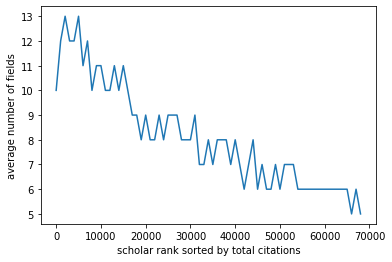

In [ ]:
fig, ax = plt.subplots()
fig.canvas.draw()
ax.plot(np.arange(len(avg_num_field)), avg_num_field)
# ax.set_xticks([0, 20000, 40000, 68128])
ax.set_xticklabels([0, 0, 10000, 20000, 30000, 40000, 50000, 60000, 70000])
ax.set_xlabel('scholar rank sorted by total citations')
ax.set_ylabel('average number of fields')
plt.show()

# cluster analysis

## increase and then decrease

In [ ]:
# clusters 1, 6, 7 are increase and then decrease
import pickle
model_labels = []
with open(GOOGLE_DRIVE_PATH+'model_label.pkl', 'rb') as f:
    model_labels = pickle.load(f)
print(model_labels)

[6 1 3 ... 0 3 3]


In [ ]:
len(model_labels) # should use scholars (new_cluster_data.jsonl)

68128

In [ ]:
cluster1_idx_list, cluster6_idx_list, cluster7_idx_list = [], [], []
for i in range(len(model_labels)):
  if model_labels[i] == 1:
    cluster1_idx_list.append(i)
  elif model_labels[i] == 6:
    cluster6_idx_list.append(i)
  elif model_labels[i] == 7:
    cluster7_idx_list.append(i)

In [ ]:
# df_scholars = pd.DataFrame.from_records(scholars)
# df_scholars

In [ ]:
from collections import defaultdict
def gen_word_freq_dict(idx_list):
  word_freq_dict = defaultdict(int)
  for idx in idx_list:
    for label in scholars[idx]['domain_labels']:
      word_freq_dict[label] += 1
  word_freq_dict = {k: v for k, v in sorted(word_freq_dict.items(), key=lambda item: item[1], reverse=True)}
  return word_freq_dict

In [ ]:
gen_word_freq_dict(cluster1_idx_list)

{'machine_learning': 4154,
 'artificial_intelligence': 2210,
 'computer_vision': 1587,
 'natural_language_processing': 668,
 'deep_learning': 492,
 'data_mining': 446,
 'image_processing': 393,
 'robotics': 357,
 'data_science': 328,
 'pattern_recognition': 260,
 'bioinformatics': 221,
 'signal_processing': 205,
 'optimization': 188,
 'information_retrieval': 178,
 'computational_linguistics': 155,
 'big_data': 146,
 'statistics': 114,
 'ai': 106,
 'nlp': 106,
 'computer_graphics': 106,
 'reinforcement_learning': 105,
 'software_engineering': 99,
 'computational_biology': 97,
 'medical_imaging': 97,
 'computer_science': 93,
 'neural_networks': 92,
 'semantic_web': 74,
 'human_computer_interaction': 70,
 'cloud_computing': 70,
 'text_mining': 66,
 'iot': 65,
 'neuroscience': 63,
 'biometrics': 62,
 'recommender_systems': 60,
 'evolutionary_computation': 55,
 'data_analytics': 52,
 'computational_neuroscience': 52,
 'multi_agent_systems': 52,
 'information_extraction': 49,
 'machine_tran

In [ ]:
gen_word_freq_dict(cluster6_idx_list)

{'machine_learning': 3208,
 'artificial_intelligence': 1827,
 'computer_vision': 1458,
 'natural_language_processing': 570,
 'data_mining': 365,
 'image_processing': 364,
 'deep_learning': 321,
 'robotics': 277,
 'data_science': 248,
 'pattern_recognition': 228,
 'information_retrieval': 173,
 'bioinformatics': 146,
 'signal_processing': 146,
 'computer_graphics': 131,
 'big_data': 124,
 'computational_linguistics': 123,
 'optimization': 112,
 'ai': 100,
 'software_engineering': 95,
 'semantic_web': 93,
 'computer_science': 90,
 'nlp': 80,
 'human_computer_interaction': 79,
 'statistics': 74,
 'distributed_systems': 69,
 'neural_networks': 69,
 'cloud_computing': 68,
 'reinforcement_learning': 67,
 'text_mining': 64,
 'multi_agent_systems': 55,
 'recommender_systems': 50,
 'medical_imaging': 50,
 'knowledge_representation': 47,
 'data_analytics': 46,
 'algorithms': 46,
 'machine_translation': 45,
 'computational_biology': 43,
 'speech_recognition': 41,
 'augmented_reality': 41,
 'biome

In [ ]:
gen_word_freq_dict(cluster7_idx_list)

{'machine_learning': 2032,
 'artificial_intelligence': 1247,
 'computer_vision': 877,
 'natural_language_processing': 373,
 'image_processing': 267,
 'deep_learning': 228,
 'robotics': 211,
 'data_mining': 204,
 'pattern_recognition': 186,
 'data_science': 159,
 'signal_processing': 151,
 'computational_linguistics': 105,
 'optimization': 79,
 'information_retrieval': 75,
 'big_data': 67,
 'reinforcement_learning': 61,
 'computer_science': 59,
 'bioinformatics': 59,
 'computer_graphics': 59,
 'software_engineering': 57,
 'nlp': 48,
 'statistics': 48,
 'ai': 44,
 'human_computer_interaction': 41,
 'neural_networks': 40,
 'text_mining': 39,
 'machine_translation': 39,
 'biometrics': 38,
 'remote_sensing': 38,
 'cloud_computing': 36,
 'internet_of_things': 35,
 'iot': 35,
 'multi_agent_systems': 34,
 'cognitive_science': 33,
 'semantic_web': 33,
 'neuroscience': 31,
 'computational_biology': 31,
 'medical_imaging': 30,
 'soft_computing': 29,
 'data_analytics': 28,
 'image_analysis': 27,
 

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def gen_wordcloud(freq_dict, cluster_num):
  freq_list = []
  for key, value in freq_dict.items():
    freq_list += value * [key]
  freq_str = ' '.join(freq_list)
  # print(freq_str)
  # generate wordcloud
  wordcloud = WordCloud(width=5000, height=4000, collocations=False, random_state=10).generate(freq_str)
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud)
  plt.title(f'cluster {cluster_num}')
  plt.axis('off')
  plt.savefig(f'cluster_{cluster_num}.pdf')

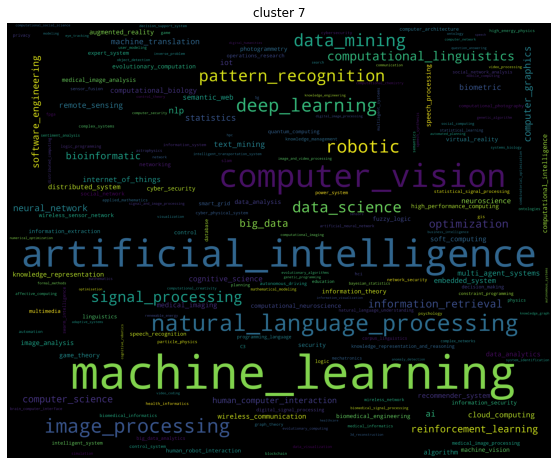

In [ ]:
gen_wordcloud(gen_word_freq_dict(cluster7_idx_list), 7)

### whether they no longer publish any new paper

In [ ]:
tmp = df_all.loc[df_all['url'] == 'https://scholar.google.com/citations?hl=en&user=bSU7LYoAAAAJ']
tmp

In [ ]:
def get_lastyear_dict(idx_list):
  year_dict = defaultdict(int)
  bug_check = []
  bug_paper_check = []
  for scholar_idx in idx_list:
    sid = scholars[scholar_idx]['gs_sid']
    url = 'https://scholar.google.com/citations?hl=en&user='+sid
    scholar_series = df_all.loc[df_all['url'] == url]
    papers = scholar_series['papers'].item()
    year_set = set()
    for paper in papers:
      if paper[5] == '':
        continue
      if int(paper[5]) <= 1950:
        bug_paper_check.append((url, int(paper[5])))
        continue
      if int(paper[5]) > 2022:
        continue
      year_set.add(int(paper[5]))
    if len(year_set) == 0:
      continue
      # year_first, year_last = 2023, 2022
      # bug_check.append(scholar['url'])
    year_last = max(year_set)
    year_dict[year_last] += 1
  return year_dict

In [ ]:
get_lastyear_dict(cluster7_idx_list)

defaultdict(int,
            {1995: 1,
             2003: 1,
             2004: 1,
             2005: 1,
             2006: 2,
             2008: 4,
             2009: 1,
             2010: 4,
             2011: 2,
             2012: 10,
             2013: 30,
             2014: 49,
             2015: 76,
             2016: 123,
             2017: 191,
             2018: 252,
             2019: 335,
             2020: 500,
             2021: 1281,
             2022: 973})

F% among all coauthors

In [ ]:
import json
with open(GOOGLE_DRIVE_PATH+"gs_scholar_new_features.jsonl") as f:
  scholar_new = [json.loads(line) for line in f if line.strip()]

In [ ]:
import pandas as pd
df_scholar_new = pd.DataFrame.from_records(scholar_new)

In [ ]:
import pandas as pd
df_scholar = pd.DataFrame.from_records(scholar_all)

In [ ]:
df_scholar.head(2)

,academic,academic_age,academic_lifespan,cit_sum_before_year,citation_table,domain_labels,gender,gs_sid,organization,organization_code,...,co_authors,name,papers,url,top_num_coauthors,num_domain,top_topic_diversity,co_authors_all,num_coauthors_all_wwo_ai,organization_top
0,False,31.0,28.0,"{'1994': 39, '1995': 86, '1996': 187, '1997': ...","[3539, 27]","[logic_programming, machine_learning, natural_...",F,IIrX5SMAAAAJ,N/A,None,...,None,Theresa Swift,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,NaN,3.0,NaN,"{HzuV4ncAAAAJ, _AAJe1sAAAAJ, Br5udFwAAAAJ, 17i...",84,0.0
1,False,27.0,24.0,"{'1996': 10, '1997': 58, '1998': 203, '1999': ...","[3502, 30]","[natural_language_processing, data_management,...",-,9gVmuMAAAAAJ,"Software Engineering Manager, Apple Inc.",11540454294127154050,...,[[https://scholar.google.com/citations?user=Sr...,George Andrei Mihaila,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,20.0,3.0,9.0,"{xiSS1ZIAAAAJ, We0kRfEAAAAJ, 6i_i8xMAAAAJ, R94...",115,1.0


F% among top coauthors

In [ ]:
cnt_dict = {
  'f_in_f': [],
  'f_in_all': []
}
for cnt, scholar in enumerate(scholar_all):
  co_authors_all = scholar['co_authors']
  # print(co_authors_all)
  gender = scholar['gender']
  if co_authors_all is not None:
    tmp_list = []
    for co_authors in co_authors_all:
      tmp_list.append(co_authors[0].split('user=', 1)[1][:12])
    f_cnt = 0
    all_cnt = 0
    for co_author in tmp_list:
      tmp = df_scholar.loc[df_scholar['gs_sid'] == co_author, 'gender']
      if not tmp.empty:
        tmp = tmp.item()
        if tmp == 'F': 
          f_cnt += 1
        all_cnt += 1
      #   co_gender_list.append(tmp.item())
    if all_cnt == 0:
      continue
    cnt_ratio = f_cnt / all_cnt
    if gender == 'F':
      cnt_dict['f_in_f'].append(cnt_ratio)
    cnt_dict['f_in_all'].append(cnt_ratio)
  # if cnt >= 15:
  #   break

In [ ]:
import pickle
with open(GOOGLE_DRIVE_PATH+'scholar/f_coauthors_in_top.pkl', 'wb') as file:
  pickle.dump(cnt_dict, file)

In [ ]:
import pandas as pd
tmp = pd.DataFrame()
tmp['f_in_f'] = cnt_dict['f_in_f']
tmp2 = pd.DataFrame()
tmp2['f_in_all'] = cnt_dict['f_in_all']

In [ ]:
tmp.describe()

,f_in_f
count,7036.000000
mean,0.470477
std,0.305553
min,0.029412
25%,0.230769
50%,0.363636
75%,0.666667
max,1.000000


In [ ]:
tmp2.describe()

,f_in_all
count,68739.000000
mean,0.174070
std,0.234293
min,0.000000
25%,0.000000
50%,0.111111
75%,0.250000
max,1.000000


F% among all coauthors

In [ ]:
cnt_dict = {
  'f_in_f': [],
  'f_in_all': []
}
for cnt, scholar in enumerate(scholar_all):
  co_authors_all = scholar['co_authors_all']
  gender = scholar['gender']
  f_cnt = 0
  m_cnt = 0
  for co_author in co_authors_all:
    tmp = df_scholar.loc[df_scholar['gs_sid'] == co_author, 'gender']
    if not tmp.empty:
      tmp = tmp.item()
      if tmp == 'F': 
        f_cnt += 1
      elif tmp == 'M':
        m_cnt += 1
    #   co_gender_list.append(tmp.item())
  if f_cnt + m_cnt == 0:
    continue
  cnt_ratio = f_cnt / (f_cnt + m_cnt)
  if gender == 'F':
    cnt_dict['f_in_f'].append(cnt_ratio)
  cnt_dict['f_in_all'].append(cnt_ratio)
  # if cnt > 10:
  #   break

In [ ]:
import pickle
with open(GOOGLE_DRIVE_PATH+'scholar/f_coauthors_in_all.pkl', 'wb') as file:
  pickle.dump(cnt_dict, file)

In [ ]:
import pickle
with open(GOOGLE_DRIVE_PATH+'scholar/f_coauthors_in_all.pkl', 'rb') as file:
  cnt_dict = pickle.load(file)

domain analysis

In [ ]:
nlp = [('natural_language_processing', 6963),
 ('computational_linguistics', 1200),
 ('nlp', 818),
 ('text_analytics', 59),
 ('text_analysis', 33),
 ('natural_language', 24),
 ('language_technology', 59),
 ('natural_language_understanding', 116),
 ('language_modeling', 39),
 ('document_analysis', 46)]

In [ ]:

total = 0
female = 0
male = 0
for index, row in df_scholar_new.iterrows():
  for nlp_item in nlp:
    if nlp_item[0] in row["domain_labels"]:
      total += 1
      if row["gender"] == 'M':
        male += 1 / len(row['domain_labels'])
      if row["gender"] == 'F':
        female += 1 / len(row['domain_labels'])
print(male)
print(female)
print(male/total)
print(female/total)

1451.4166666666893
530.7999999999956
0.14978500171998857
0.05477812177502535


probability vs number of all coauthors

In [5]:
df.head(2)

,academic,academic_age,academic_lifespan,cit_sum_before_year,citation_table,domain_labels,gender,gs_sid,organization,organization_code,...,co_authors,name,papers,url,top_num_coauthors,num_domain,top_topic_diversity,co_authors_all,num_coauthors_all_wwo_ai,organization_top
0,False,31.0,28.0,"{'1994': 39, '1995': 86, '1996': 187, '1997': ...","[3539, 27]","[logic_programming, machine_learning, natural_...",F,IIrX5SMAAAAJ,N/A,None,...,None,Theresa Swift,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,NaN,3.0,NaN,"{EIaA0EMAAAAJ, Br5udFwAAAAJ, i37R1QgAAAAJ, qJ9...",84,0.0
1,False,27.0,24.0,"{'1996': 10, '1997': 58, '1998': 203, '1999': ...","[3502, 30]","[natural_language_processing, data_management,...",-,9gVmuMAAAAAJ,"Software Engineering Manager, Apple Inc.",11540454294127154050,...,[[https://scholar.google.com/citations?user=Sr...,George Andrei Mihaila,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,20.0,3.0,9.0,"{tjWt_1MAAAAJ, AsyAUTIAAAAJ, mQMC3aYAAAAJ, R94...",115,1.0


In [197]:
from collections import defaultdict
female_cnt_dict, male_cnt_dict, unclass_cnt_dict = defaultdict(int), defaultdict(int), defaultdict(int)
for idx, row in df.iterrows():
  num_coauthor = round(row['mean_num_coauthors_all'])
  if row['gender'] == '-':
    # print(row['num_coauthors_all_wwo_ai'])
    unclass_cnt_dict[num_coauthor] += 1
  elif row['gender'] == 'F':
    female_cnt_dict[num_coauthor] += 1
  else:
    male_cnt_dict[num_coauthor] += 1

In [198]:
male_cnt_dict

defaultdict(int,
            {1: 108,
             2: 1966,
             3: 9047,
             4: 13036,
             5: 6139,
             6: 1581,
             7: 165,
             8: 28,
             9: 3,
             10: 1})

In [199]:
def get_bar_n_list(in_dict, bar=None, max_bar=None): # female_cnt100_dict, 100, 1000
  # print(tmp_dict)
  if bar is not None and max_bar is not None:
    tmp_dict = []
    for i in range(0, max_bar+bar, bar):
      tmp_dict.append([i, 0])
    for num_co, cnt in in_dict.items():
      if num_co > max_bar:
        i = max_bar
        tmp_dict[i//bar][1] += cnt
      else:
        i = (num_co // bar) * bar
        tmp_dict[i//bar][1] += cnt
        # print(tmp_dict, num_co, cnt)
        # break
  else:
    tmp_dict = []
    for i in range(0, max_bar+1, 1):
      tmp_dict.append([i, 0])
    for num_co, cnt in in_dict.items():
      if num_co > max_bar:
        i = int(max_bar)
        tmp_dict[i][1] += cnt
      else:
        i = int(num_co)
        tmp_dict[i][1] += cnt
        # print(tmp_dict, num_co, cnt)
        # break
  print(tmp_dict)
  return tmp_dict

In [200]:
female_cnt100_list = get_bar_n_list(female_cnt_dict, max_bar=15)
male_cnt100_list = get_bar_n_list(male_cnt_dict, max_bar=15)
unclass_cnt100_list = get_bar_n_list(unclass_cnt_dict, max_bar=15)

[[0, 0], [1, 24], [2, 447], [3, 1985], [4, 2648], [5, 1437], [6, 435], [7, 52], [8, 6], [9, 2], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0]]
[[0, 0], [1, 108], [2, 1966], [3, 9047], [4, 13036], [5, 6139], [6, 1581], [7, 165], [8, 28], [9, 3], [10, 1], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0]]
[[0, 0], [1, 125], [2, 2340], [3, 10345], [4, 14281], [5, 8329], [6, 2852], [7, 544], [8, 120], [9, 17], [10, 3], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0]]


In [201]:
female_cnt100_list, male_cnt100_list, unclass_cnt100_list

([[0, 0],
  [1, 24],
  [2, 447],
  [3, 1985],
  [4, 2648],
  [5, 1437],
  [6, 435],
  [7, 52],
  [8, 6],
  [9, 2],
  [10, 0],
  [11, 0],
  [12, 0],
  [13, 0],
  [14, 0],
  [15, 0]],
 [[0, 0],
  [1, 108],
  [2, 1966],
  [3, 9047],
  [4, 13036],
  [5, 6139],
  [6, 1581],
  [7, 165],
  [8, 28],
  [9, 3],
  [10, 1],
  [11, 0],
  [12, 0],
  [13, 0],
  [14, 0],
  [15, 0]],
 [[0, 0],
  [1, 125],
  [2, 2340],
  [3, 10345],
  [4, 14281],
  [5, 8329],
  [6, 2852],
  [7, 544],
  [8, 120],
  [9, 17],
  [10, 3],
  [11, 0],
  [12, 0],
  [13, 0],
  [14, 0],
  [15, 0]])

In [202]:
# only when max_bar = 15
unclass_cnt100_list.remove([0, 0])
male_cnt100_list.remove([0, 0])
female_cnt100_list.remove([0, 0])

In [203]:
female_sum, male_sum, unclass_sum = sum(item[1] for item in female_cnt100_list), sum(item[1] for item in male_cnt100_list), sum(item[1] for item in unclass_cnt100_list)
female_sum, male_sum, unclass_sum

(7036, 32074, 38956)

In [204]:
nonfemale_cnt100_list = [[item1[0], item1[1]+item2[1]] for item1, item2 in zip(male_cnt100_list, unclass_cnt100_list)]
nonfemale_cnt100_list

[[1, 233],
 [2, 4306],
 [3, 19392],
 [4, 27317],
 [5, 14468],
 [6, 4433],
 [7, 709],
 [8, 148],
 [9, 20],
 [10, 4],
 [11, 0],
 [12, 0],
 [13, 0],
 [14, 0],
 [15, 0]]

In [216]:
x = [i for i in range(1, 16, 1)]
female_prob = [round(item[1] / female_sum, 5) for item in female_cnt100_list]
nonfemale_prob = [round(item[1] / (male_sum+unclass_sum), 5) for item in nonfemale_cnt100_list]
male_prob = [round(item[1] / male_sum, 5) for item in male_cnt100_list]
female_prob, nonfemale_prob, male_prob

([0.00341,
  0.06353,
  0.28212,
  0.37635,
  0.20424,
  0.06182,
  0.00739,
  0.00085,
  0.00028,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.00328,
  0.06062,
  0.27301,
  0.38458,
  0.20369,
  0.06241,
  0.00998,
  0.00208,
  0.00028,
  6e-05,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.00337,
  0.0613,
  0.28207,
  0.40644,
  0.1914,
  0.04929,
  0.00514,
  0.00087,
  9e-05,
  3e-05,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])

## probability vs. the number of coauthors all

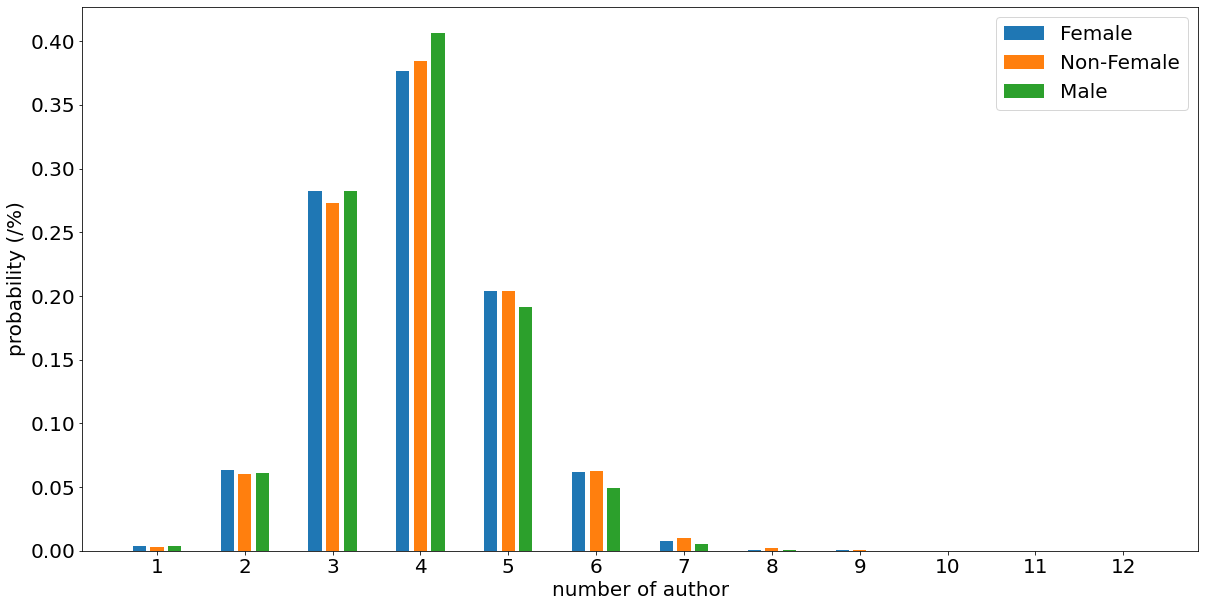

In [206]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20, 10))
x_axis = np.arange(1, 13, 1)
x_axis_label = [str(x) for x in x_axis][:12]
# x_axis_label[-1] = '>320'
plt.rcParams.update({'font.size': 20})
# Multi bar Chart

plt.bar(x_axis -0.2, female_prob[:12], width=0.15, label = 'Female')
plt.bar(x_axis +0, nonfemale_prob[:12], width=0.15, label = 'Non-Female')
plt.bar(x_axis +0.2, male_prob[:12], width=0.15, label = 'Male')

# Xticks

plt.xticks(x_axis, x_axis_label)
plt.xlabel("number of author")
plt.ylabel("probability (/%)")
# Add legend

plt.legend()

# Display

plt.show()

probability vs number of all coauthors update (average num_papers per scholar)

In [186]:
# count the number of all coauthors, including those are not in ai scholars
import numpy as np
for scholar in scholar_all:
  num_coauthors_list = []
  for paper in scholar['papers']:
    coauth_item_list = paper[2][0].split(', ')
    if coauth_item_list == ['...'] or coauth_item_list == ['']:
      continue
    if '...' in coauth_item_list:
      num_coauthors_list.append(len(coauth_item_list) - 1)
    else:
      num_coauthors_list.append(len(coauth_item_list))
  num_coauthors_list = np.array(num_coauthors_list)
  # print(num_coauthors_list[:100])
  mean_val = np.mean(num_coauthors_list)
  # print(mean_val)
  scholar['mean_num_coauthors_all'] = mean_val

In [193]:
scholar_all[4]['mean_num_coauthors_all']

3.5585284280936453

In [188]:
import numpy as np
np.save(GOOGLE_DRIVE_PATH+'general/gs_scholars_all_upd_more.npy', scholar_all)

In [194]:
# %%capture
import pandas as pd
df = pd.DataFrame.from_records(scholar_all)
df.head(1)

,academic,academic_age,academic_lifespan,cit_sum_before_year,citation_table,domain_labels,gender,gs_sid,organization,organization_code,...,name,papers,url,top_num_coauthors,num_domain,top_topic_diversity,co_authors_all,num_coauthors_all_wwo_ai,organization_top,mean_num_coauthors_all
0,False,31.0,28.0,"{'1994': 39, '1995': 86, '1996': 187, '1997': ...","[3539, 27]","[logic_programming, machine_learning, natural_...",F,IIrX5SMAAAAJ,N/A,None,...,Theresa Swift,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,NaN,3.0,NaN,"{EIaA0EMAAAAJ, Br5udFwAAAAJ, i37R1QgAAAAJ, qJ9...",84,0.0,3.10596


In [195]:
df['mean_num_coauthors_all'].describe()

count    78066.000000
mean         3.961295
std          1.021042
min          1.000000
25%          3.259259
50%          3.888889
75%          4.600000
max         10.000000
Name: mean_num_coauthors_all, dtype: float64

# coauthor diversity table

In [218]:
pd.set_option('display.max_columns', 500)
df.head(2)

,academic,academic_age,academic_lifespan,cit_sum_before_year,citation_table,domain_labels,gender,gs_sid,organization,organization_code,paper_num,cites,co_authors,name,papers,url,top_num_coauthors,num_domain,top_topic_diversity,co_authors_all,num_coauthors_all_wwo_ai,organization_top,mean_num_coauthors_all
0,False,31.0,28.0,"{'1994': 39, '1995': 86, '1996': 187, '1997': ...","[3539, 27]","[logic_programming, machine_learning, natural_...",F,IIrX5SMAAAAJ,N/A,None,151,"{'years': ['1994', '1995', '1996', '1997', '19...",None,Theresa Swift,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,NaN,3.0,NaN,"{EIaA0EMAAAAJ, Br5udFwAAAAJ, i37R1QgAAAAJ, qJ9...",84,0.0,3.105960
1,False,27.0,24.0,"{'1996': 10, '1997': 58, '1998': 203, '1999': ...","[3502, 30]","[natural_language_processing, data_management,...",-,9gVmuMAAAAAJ,"Software Engineering Manager, Apple Inc.",11540454294127154050,118,"{'years': ['1996', '1997', '1998', '1999', '20...",[[https://scholar.google.com/citations?user=Sr...,George Andrei Mihaila,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,20.0,3.0,9.0,"{tjWt_1MAAAAJ, AsyAUTIAAAAJ, mQMC3aYAAAAJ, R94...",115,1.0,3.686441


In [5]:
import pandas as pd
df_causal = pd.read_csv(GOOGLE_DRIVE_PATH+"causal_upd_mv.csv")

In [6]:
df_causal

,Unnamed: 0,nationality,top_num_coauthors,num_domain,gender,academic,senior,citation,num_papers,hindex,url,dropout,co_findable_ratio,co_avg_nationality_div,co_num_coauthors_all,co_num_coauthors_all_wwo_ai,co_avg_num_domain_div,organization_top,co_female_ratio,co_top10_ratio
0,0,Japan,NaN,3,1,0,1,3539,151,27,https://scholar.google.com/citations?hl=en&use...,0,0.373134,0.380000,50,134,1.520000,0.0,0.200000,0.020000
1,1,Hungary,20.0,3,2,0,1,3502,118,30,https://scholar.google.com/citations?hl=en&use...,0,0.323077,0.380952,63,195,1.666667,1.0,0.095238,0.206349
2,2,Taiwan,NaN,2,0,1,1,3441,93,29,https://scholar.google.com/citations?hl=en&use...,0,0.162162,0.333333,12,74,0.916667,0.0,0.250000,0.083333
3,3,Taiwan,2.0,3,2,1,0,3648,62,23,https://scholar.google.com/citations?hl=en&use...,0,0.205128,0.062500,16,78,1.125000,0.0,0.187500,0.000000
4,4,Taiwan,20.0,5,2,1,1,3473,300,25,https://scholar.google.com/citations?hl=en&use...,0,0.139706,0.210526,57,408,1.298246,0.0,0.017544,0.017544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78061,78061,Taiwan,8.0,3,1,1,0,1960,10,7,https://scholar.google.com/citations?hl=en&use...,0,0.520833,0.080000,25,48,0.720000,0.0,0.040000,0.080000
78062,78062,Italy,NaN,5,0,1,0,956,81,19,https://scholar.google.com/citations?hl=en&use...,0,0.304762,0.500000,32,105,2.312500,0.0,0.218750,0.062500
78063,78063,Switzerland,NaN,4,2,1,0,115,31,7,https://scholar.google.com/citations?hl=en&use...,0,0.114286,0.750000,4,35,3.750000,0.0,0.250000,0.000000
78064,78064,Taiwan,18.0,3,0,0,1,9043,117,55,https://scholar.google.com/citations?hl=en&use...,0,0.010152,1.000000,2,197,3.000000,0.0,0.500000,0.000000


In [9]:
df_causal.describe()

,Unnamed: 0,top_num_coauthors,num_domain,gender,academic,senior,citation,num_papers,hindex,dropout,co_findable_ratio,co_avg_nationality_div,co_num_coauthors_all,co_num_coauthors_all_wwo_ai,co_avg_num_domain_div,organization_top,co_female_ratio,co_top10_ratio
count,78066.000000,53729.000000,78066.000000,78066.000000,78066.00000,78066.000000,78066.000000,78066.000000,78066.000000,78066.000000,78066.000000,78066.000000,78066.000000,78066.000000,78066.000000,78066.000000,78066.000000,78066.000000
mean,39032.500000,11.021739,3.616017,1.088156,0.60030,0.532921,2122.800605,67.307637,13.998194,0.085223,0.182782,0.666453,25.009505,114.294738,2.477947,0.066085,0.087770,0.067600
std,22535.857394,6.592891,1.197896,0.949795,0.48984,0.498918,8626.500921,126.912748,13.235028,0.279215,0.143852,0.274369,59.549510,202.678816,0.991311,0.248432,0.142665,0.141488
min,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,2.000000,1.000000,1.000000,0.000000,0.002523,0.023256,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,19516.250000,5.000000,3.000000,0.000000,0.00000,0.000000,213.000000,17.000000,7.000000,0.000000,0.073064,0.460317,3.000000,35.000000,1.735294,0.000000,0.000000,0.000000
50%,39032.500000,10.000000,4.000000,1.000000,1.00000,1.000000,472.000000,31.000000,10.000000,0.000000,0.147059,0.666667,8.000000,62.000000,2.333333,0.000000,0.033333,0.000000
75%,58548.750000,19.000000,5.000000,2.000000,1.00000,1.000000,1339.000000,68.000000,16.000000,0.000000,0.257143,1.000000,19.000000,119.000000,3.000000,0.000000,0.125000,0.073529
max,78065.000000,20.000000,5.000000,2.000000,1.00000,1.000000,533757.000000,3000.000000,266.000000,1.000000,0.974790,1.000000,1241.000000,7388.000000,5.000000,1.000000,1.000000,1.000000


In [10]:
df_causal.loc[df_causal['gender']==1].describe()

,Unnamed: 0,top_num_coauthors,num_domain,gender,academic,senior,citation,num_papers,hindex,dropout,co_findable_ratio,co_avg_nationality_div,co_num_coauthors_all,co_num_coauthors_all_wwo_ai,co_avg_num_domain_div,organization_top,co_female_ratio,co_top10_ratio
count,7036.000000,4479.000000,7036.000000,7036.0,7036.000000,7036.00000,7036.000000,7036.000000,7036.000000,7036.000000,7036.000000,7036.000000,7036.000000,7036.000000,7036.000000,7036.000000,7036.000000,7036.000000
mean,37789.071347,10.698147,3.542496,1.0,0.615691,0.52203,1757.086555,60.064952,13.222143,0.087123,0.198489,0.672106,26.282831,105.968164,2.438883,0.065236,0.324238,0.069760
std,23004.973614,6.550895,1.226936,0.0,0.486466,0.49955,6237.355521,103.834092,12.661094,0.282036,0.148024,0.271106,61.087942,172.896782,0.962738,0.246959,0.268889,0.144252
min,0.000000,1.000000,0.000000,1.0,0.000000,0.00000,17.000000,1.000000,1.000000,0.000000,0.002841,0.043478,1.000000,2.000000,0.500000,0.000000,0.016393,0.000000
25%,18452.750000,5.000000,3.000000,1.0,0.000000,0.00000,195.000000,16.000000,6.000000,0.000000,0.085099,0.474671,3.000000,33.000000,1.727273,0.000000,0.142857,0.000000
50%,36695.500000,10.000000,4.000000,1.0,1.000000,1.00000,411.000000,29.000000,9.000000,0.000000,0.166667,0.666667,8.000000,58.000000,2.300000,0.000000,0.230769,0.000000
75%,58190.000000,18.000000,5.000000,1.0,1.000000,1.00000,1161.000000,64.000000,15.000000,0.000000,0.277778,1.000000,21.000000,114.000000,3.000000,0.000000,0.400000,0.076923
max,78061.000000,20.000000,5.000000,1.0,1.000000,1.00000,209549.000000,2125.000000,211.000000,1.000000,0.936170,1.000000,1042.000000,4016.000000,5.000000,1.000000,1.000000,1.000000


In [14]:
df_causal.loc[df_causal['co_female_ratio']==1]

,Unnamed: 0,nationality,top_num_coauthors,num_domain,gender,academic,senior,citation,num_papers,hindex,url,dropout,co_findable_ratio,co_avg_nationality_div,co_num_coauthors_all,co_num_coauthors_all_wwo_ai,co_avg_num_domain_div,organization_top,co_female_ratio,co_top10_ratio
1108,1108,Italy,7.0,4,1,1,0,407,4,2,https://scholar.google.com/citations?hl=en&use...,0,0.055556,1.0,1,18,4.0,0.0,1.0,0.0
1368,1368,Taiwan,2.0,5,1,0,0,672,7,4,https://scholar.google.com/citations?hl=en&use...,1,0.142857,1.0,1,7,5.0,0.0,1.0,0.0
1815,1815,Russia,11.0,5,1,0,1,512,59,12,https://scholar.google.com/citations?hl=en&use...,1,0.051282,1.0,2,39,3.5,0.0,1.0,0.0
2189,2189,India,6.0,5,1,0,1,458,57,11,https://scholar.google.com/citations?hl=en&use...,0,0.023810,1.0,1,42,5.0,0.0,1.0,0.0
2229,2229,India,NaN,2,1,1,1,433,6,2,https://scholar.google.com/citations?hl=en&use...,0,0.083333,1.0,1,12,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77435,77435,Israel,2.0,4,1,1,1,157,11,6,https://scholar.google.com/citations?hl=en&use...,1,0.041667,1.0,1,24,4.0,0.0,1.0,0.0
77465,77465,Nepal,6.0,5,1,1,0,153,12,6,https://scholar.google.com/citations?hl=en&use...,0,0.052632,1.0,1,19,5.0,0.0,1.0,0.0
77498,77498,Taiwan,NaN,5,1,1,0,150,12,8,https://scholar.google.com/citations?hl=en&use...,0,0.062500,1.0,1,16,5.0,0.0,1.0,0.0
77512,77512,India,NaN,5,1,0,1,110,19,3,https://scholar.google.com/citations?hl=en&use...,0,0.023256,1.0,1,43,5.0,0.0,1.0,0.0


In [15]:
df_causal.loc[df_causal['co_num_coauthors_all']>=20].describe()

,Unnamed: 0,top_num_coauthors,num_domain,gender,academic,senior,citation,num_papers,hindex,dropout,co_findable_ratio,co_avg_nationality_div,co_num_coauthors_all,co_num_coauthors_all_wwo_ai,co_avg_num_domain_div,organization_top,co_female_ratio,co_top10_ratio
count,19492.000000,14698.000000,19492.000000,19492.000000,19492.000000,19492.000000,19492.000000,19492.000000,19492.000000,19492.000000,19492.000000,19492.000000,19492.000000,19492.000000,19492.000000,19492.000000,19492.000000,19492.000000
mean,35366.105787,15.112192,3.558024,0.969218,0.606146,0.739380,6155.868613,155.856557,25.570798,0.029756,0.319749,0.408038,80.764416,273.895342,1.640657,0.091781,0.095826,0.093714
std,25814.435420,6.099914,1.244378,0.950942,0.488616,0.438984,16235.263075,219.567268,19.872155,0.169917,0.165720,0.171490,99.948623,348.684490,0.466730,0.288724,0.061805,0.121513
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.008188,0.023256,20.000000,30.000000,0.435897,0.000000,0.000000,0.000000
25%,9878.750000,10.000000,3.000000,0.000000,0.000000,0.000000,856.000000,42.000000,13.000000,0.000000,0.202020,0.270833,27.000000,108.000000,1.295455,0.000000,0.052083,0.018868
50%,38723.500000,20.000000,4.000000,1.000000,1.000000,1.000000,2092.000000,90.000000,20.000000,0.000000,0.293333,0.413793,42.000000,175.000000,1.619225,0.000000,0.086957,0.050000
75%,60397.500000,20.000000,5.000000,2.000000,1.000000,1.000000,5279.250000,182.000000,31.000000,0.000000,0.399021,0.538462,86.000000,303.000000,1.961630,0.000000,0.125000,0.121212
max,78062.000000,20.000000,5.000000,2.000000,1.000000,1.000000,533757.000000,3000.000000,266.000000,1.000000,0.974790,0.950000,1241.000000,7388.000000,3.500000,1.000000,0.487179,0.890625


In [16]:
df_causal.loc[(df_causal['co_num_coauthors_all']>=20) & (df_causal['gender'] == 1)].describe()

,Unnamed: 0,top_num_coauthors,num_domain,gender,academic,senior,citation,num_papers,hindex,dropout,co_findable_ratio,co_avg_nationality_div,co_num_coauthors_all,co_num_coauthors_all_wwo_ai,co_avg_num_domain_div,organization_top,co_female_ratio,co_top10_ratio
count,1848.000000,1337.000000,1848.000000,1848.0,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000
mean,34164.272727,15.000000,3.476732,1.0,0.635281,0.753247,4842.733766,133.341991,23.937229,0.035173,0.339536,0.421271,81.734848,245.720779,1.638789,0.083333,0.145279,0.096306
std,26731.212902,5.943723,1.296574,0.0,0.481481,0.431239,11358.228079,172.570869,18.995265,0.184267,0.164591,0.173803,99.881278,283.764729,0.443498,0.276460,0.075195,0.123544
min,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,95.000000,4.000000,2.000000,0.000000,0.018657,0.043478,20.000000,38.000000,0.588235,0.000000,0.016393,0.000000
25%,8270.250000,10.000000,3.000000,1.0,0.000000,1.000000,713.750000,41.000000,12.000000,0.000000,0.221800,0.285466,28.000000,104.000000,1.316972,0.000000,0.090909,0.024134
50%,29881.500000,19.000000,4.000000,1.0,1.000000,1.000000,1742.000000,85.000000,19.000000,0.000000,0.313192,0.428571,44.000000,169.000000,1.615385,0.000000,0.130435,0.055556
75%,61067.750000,20.000000,5.000000,1.0,1.000000,1.000000,4194.750000,162.000000,30.000000,0.000000,0.421875,0.550000,87.000000,278.000000,1.952381,0.000000,0.185752,0.125000
max,78061.000000,20.000000,5.000000,1.0,1.000000,1.000000,209549.000000,2125.000000,211.000000,1.000000,0.936170,0.950000,1042.000000,4016.000000,3.200000,1.000000,0.487179,0.863636


In [ ]:
df.loc[df['gender'] == 'F']

In [228]:
df.loc[df['gender'] == 'M']

,academic,academic_age,academic_lifespan,cit_sum_before_year,citation_table,domain_labels,gender,gs_sid,organization,organization_code,paper_num,cites,co_authors,name,papers,url,top_num_coauthors,num_domain,top_topic_diversity,co_authors_all,num_coauthors_all_wwo_ai,organization_top,mean_num_coauthors_all
2,True,20.0,19.0,"{'2004': 15, '2005': 64, '2006': 146, '2007': ...","[3441, 29]","[natural_language_processing, information_retr...",M,EmTFUdQAAAAJ,"Professor, University of Chinese Academy of Sc...",16853398057353869326,93,"{'years': ['2004', '2005', '2006', '2007', '20...",None,Ben He,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,NaN,2.0,NaN,"{mu5lLakAAAAJ, 7PQuCbgAAAAJ, EmTFUdQAAAAJ, gci...",62,0.0,3.602151
5,True,27.0,27.0,"{'2004': 26, '2005': 71, '2006': 119, '2007': ...","[3494, 27]",[natural_language_processing],M,LaKNyhQAAAAJ,Peking University,10725744176602846184,203,"{'years': ['2004', '2005', '2006', '2007', '20...",[[https://scholar.google.com/citations?user=6h...,Baobao CHANG,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,4.0,1.0,6.0,"{Oh5S2skAAAAJ, 93zngeYAAAAJ, 2RxXFPoAAAAJ, gA1...",200,0.0,3.167488
6,False,27.0,27.0,"{'1998': 26, '1999': 58, '2000': 97, '2001': 1...","[3293, 13]","[natural_language_processing, search, computat...",M,x8ju9EEAAAAJ,Unknown affiliation,None,29,"{'years': ['1998', '1999', '2000', '2001', '20...",None,Doug Beeferman,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,NaN,3.0,NaN,"{x8ju9EEAAAAJ, ruQ7SNYAAAAJ, btoec6QAAAAJ, RsZ...",41,0.0,3.344828
7,True,13.0,12.0,"{'2011': 12, '2012': 31, '2013': 58, '2014': 8...","[3502, 18]","[language_and_vision, natural_language_process...",M,6RxMYNEAAAAJ,University of Pennsylvania,18168328457749716238,33,"{'years': ['2011', '2012', '2013', '2014', '20...",None,Mark Yatskar,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,NaN,5.0,NaN,"{bWoGh8UAAAAJ, 4WvFs_IAAAAJ, 23ZXZvEAAAAJ, yE6...",68,0.0,4.606061
9,False,47.0,47.0,"{'2004': 9, '2005': 17, '2006': 35, '2007': 64...","[2882, 29]","[natural_language_processing, information_retr...",M,WR1ImCMAAAAJ,"Principal Researcher, Microsoft Research Lab I...",12331530069074480064,172,"{'years': ['2004', '2005', '2006', '2007', '20...",[[https://scholar.google.com/citations?user=lf...,Monojit Choudhury,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,20.0,5.0,22.0,"{bZliC98AAAAJ, qTNRwTkAAAAJ, 66pwIBcAAAAJ, lvm...",195,1.0,4.017442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78057,True,16.0,10.0,"{'2010': 3, '2011': 7, '2012': 18, '2013': 25,...","[168, 4]","[computational_linguistics, call, computer_bas...",M,jmT-vOUAAAAJ,"Associate professor of Linguistics, Imam Abdul...",None,9,"{'years': ['2010', '2011', '2012', '2013', '20...",[[https://scholar.google.com/citations?user=C-...,Saad Alamri,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,1.0,5.0,0.0,"{jmT-vOUAAAAJ, C-45lDgAAAAJ}",8,0.0,1.444444
78058,True,12.0,8.0,"{'2012': 2, '2013': 5, '2014': 13, '2015': 26,...","[119, 5]","[computational_linguistics, natural_language_g...",M,Sde63E4AAAAJ,"Phd Student, University of Potsdam",207441852880273510,10,"{'years': ['2012', '2013', '2014', '2015', '20...",None,nikos engonopoulos,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,NaN,2.0,NaN,"{l2CFSAMAAAAJ, FKUc3vsAAAAJ, -pec7wIAAAAJ, Sde...",15,0.0,2.900000
78062,True,12.0,12.0,"{'2012': 5, '2013': 15, '2014': 30, '2015': 58...","[956, 19]","[artificial_intelligence, differential_privacy...",M,ASf9Q04AAAAJ,Syracuse University,10327480095728718436,81,"{'years': ['2012', '2013', '2014', '2015', '20...",None,Ferdinando Fioretto,[[https://scholar.google.com/cit

In [73]:
df

,academic,academic_age,academic_lifespan,cit_sum_before_year,citation_table,domain_labels,gender,gs_sid,organization,organization_code,paper_num,cites,co_authors,name,papers,url,top_num_coauthors,num_domain,top_topic_diversity,co_authors_all,num_coauthors_all_wwo_ai,organization_top
0,False,31.0,28.0,"{'1994': 39, '1995': 86, '1996': 187, '1997': ...","[3539, 27]","[logic_programming, machine_learning, natural_...",F,IIrX5SMAAAAJ,N/A,None,151,"{'years': ['1994', '1995', '1996', '1997', '19...",None,Theresa Swift,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,NaN,3.0,NaN,"{X3FwUngAAAAJ, IIrX5SMAAAAJ, ReF98QcAAAAJ, k-H...",84,0.0
1,False,27.0,24.0,"{'1996': 10, '1997': 58, '1998': 203, '1999': ...","[3502, 30]","[natural_language_processing, data_management,...",-,9gVmuMAAAAAJ,"Software Engineering Manager, Apple Inc.",11540454294127154050,118,"{'years': ['1996', '1997', '1998', '1999', '20...",[[https://scholar.google.com/citations?user=Sr...,George Andrei Mihaila,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,20.0,3.0,9.0,"{Kp3lRSoAAAAJ, jWdEzfgAAAAJ, BuO0s0MAAAAJ, p5n...",115,1.0
2,True,20.0,19.0,"{'2004': 15, '2005': 64, '2006': 146, '2007': ...","[3441, 29]","[natural_language_processing, information_retr...",M,EmTFUdQAAAAJ,"Professor, University of Chinese Academy of Sc...",16853398057353869326,93,"{'years': ['2004', '2005', '2006', '2007', '20...",None,Ben He,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,NaN,2.0,NaN,"{gcisxGEAAAAJ, mu5lLakAAAAJ, dXkFCYoAAAAJ, 6bF...",62,0.0
3,True,10.0,10.0,"{'2014': 14, '2015': 45, '2016': 172, '2017': ...","[3648, 23]","[question_answering, dialogue_system, natural_...",-,zBPIt3QAAAAJ,Assistant researcher of Institute of Automatio...,2751420617708739826,62,"{'years': ['2014', '2015', '2016', '2017', '20...",[[https://scholar.google.com/citations?user=Dt...,Shizhu He,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,2.0,3.0,5.0,"{1gw3LJQAAAAJ, 9z7GPxIAAAAJ, z8jOgcQAAAAJ, RvB...",62,0.0
4,True,21.0,21.0,"{'2006': 10, '2007': 53, '2008': 104, '2009': ...","[3473, 25]","[natural_language_processing, machine_learning...",-,vM9772wAAAAJ,Professor - JAIST,4208498446222246415,300,"{'years': ['2006', '2007', '2008', '2009', '20...",[[https://scholar.google.com/citations?user=9H...,Nguyen Le Minh,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,20.0,5.0,19.0,"{grsLl2wAAAAJ, IrwwO8cAAAAJ, fSRJLGqDs7QC, cHQ...",342,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78061,True,5.0,4.0,"{'2019': 142, '2020': 782, '2021': 1946}","[1960, 7]","[computer_vision, object_detection, instance_s...",F,GDvt570AAAAJ,Chinese University of Hong Kong,3220904064098251966,10,"{'years': ['2019', '2020', '2021', '2022'], 'c...",[[https://scholar.google.com/citations?user=55...,Jiaqi Wang,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,8.0,3.0,7.0,"{pw_0Z_UAAAAJ, udZam0oAAAAJ, nZ_PVbsAAAAJ, hW2...",22,0.0
78062,True,12.0,12.0,"{'2012': 5, '2013': 15, '2014': 30, '2015': 58...","[956, 19]","[artificial_intelligence, differential_privacy...",M,ASf9Q04AAAAJ,Syracuse University,10327480095728718436,81,"{'years': ['2012', '2013', '2014', '2015', '20...",None,Ferdinando Fioretto,[[https://scholar.google.com/citations?view_op...,https://scholar.google.com/citations?hl=en&use...,NaN,5.0,NaN,"{BWf7328AAAAJ, -0LFOnYAAAAJ, PI_3bqEAAAAJ, jF9...",73,0.0
78063,True,10.0,9.0,"{'2014': 1, '2015': 3, '2016': 9, '2017': 20, ...","[115, 7]","[computational_linguistics, historical_languag...",-,Yz7kxUMAAAAJ,University of Konstanz,16008520586621520646,31,"{'years': ['2014', '2015', '2016', '2017', '20...",None,Christin Beck (née Schätzle),[[https://scholar.google.com/citations?view_op...,